In [1]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [2]:
diabetes = datasets.load_diabetes()

In [3]:
# print(list(diabetes))
# print(diabetes['DESCR'])

In [4]:
df = pd.DataFrame(diabetes['data'], columns = diabetes['feature_names'])
print(df.shape)
df

(442, 10)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [5]:
draft = df = df[['bmi', 's1', 's2', 's3', 's4', 's5', 's6']]

In [6]:
cp = draft

In [7]:
df.columns

Index(['bmi', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

---
- **UTILISER BOXPLOT DEPUS PANDAS POUR DETECTER LES VALEURS ABERRANTES(OUTLIERS)**

In [8]:
def myboxplot(data = df):
    plt.figure(figsize = (16,6))
    plt.grid()
    df.boxplot()

- *Appel de la fonction precedente*

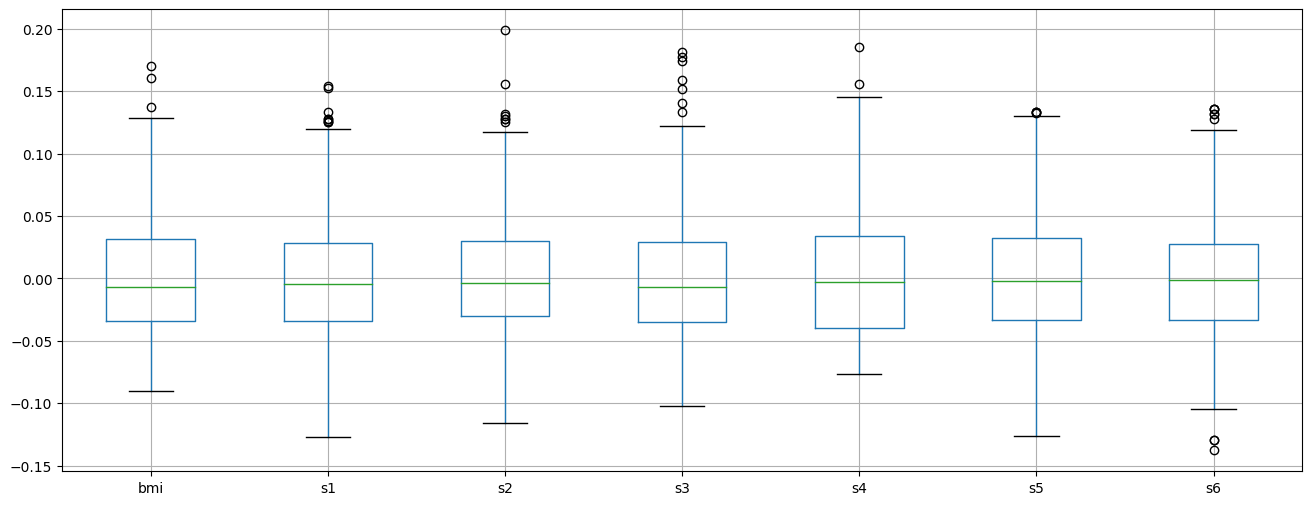

In [9]:
myboxplot()

---
- UTILISER **SEABORN BOXPLOT** POUR DETECTER LES VALEURS ABERRANTES(OUTLIERS)

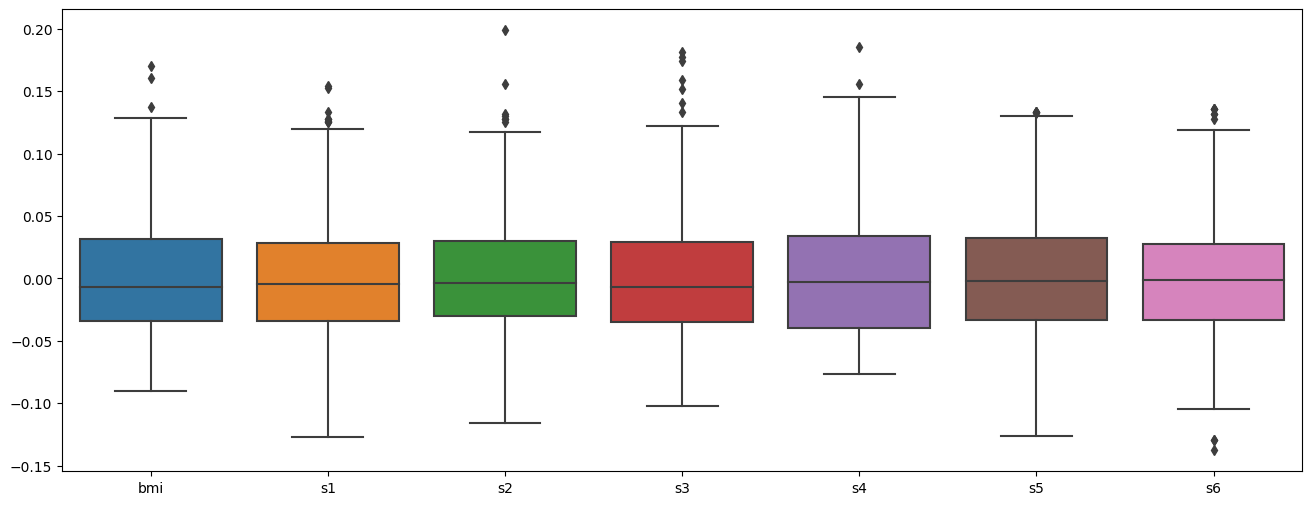

In [10]:
plt.figure(figsize = (16,6))
sns.boxplot(data = df)
plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   bmi     442 non-null    float64
 1   s1      442 non-null    float64
 2   s2      442 non-null    float64
 3   s3      442 non-null    float64
 4   s4      442 non-null    float64
 5   s5      442 non-null    float64
 6   s6      442 non-null    float64
dtypes: float64(7)
memory usage: 24.3 KB


In [12]:
df.columns

Index(['bmi', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

In [13]:
draft = df = df[['bmi', 's1', 's2', 's3', 's4', 's5', 's6']]

---
- **ALGO POUR REMPLACER LES OUTLIERS**

In [14]:
def impute_outliers(df, colname):
    q1 = np.percentile(df[colname], 25)
    q3 = np.percentile(df[colname], 75) 
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    
    df.loc[(df[colname] < lower_bound), colname] = lower_bound
    df.loc[(df[colname] > upper_bound), colname] = upper_bound

---
- **REMPLACER L'ENSEMBLES DES VALEURS ABERRANTES**

In [15]:
for colname in df.columns:
    impute_outliers(df, colname)

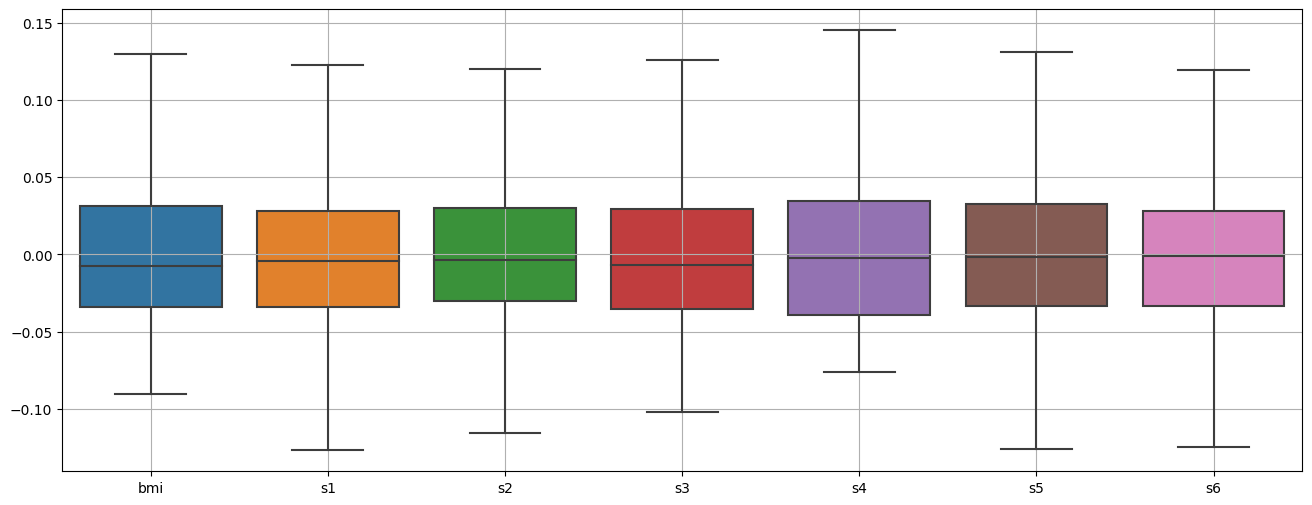

In [16]:
plt.figure(figsize = (16,6))
sns.boxplot(data = df)
plt.grid()
plt.show()

**SUPPRESSION DES VALEURS ABERRANTES**

In [17]:
def drop_outliers(df, colname):
    Q1 = np.percentile(df[colname], 25)
    Q3 = np.percentile(df[colname], 75)
    limit = 1.5*(Q3 - Q1)
    
    df.drop(df[df[colname] > (limit + Q3)].index, inplace = True)
    df.drop(df[df[colname] < (Q1 - limit)].index, inplace = True)

In [18]:
for colname in draft.columns:
    drop_outliers(draft, colname)

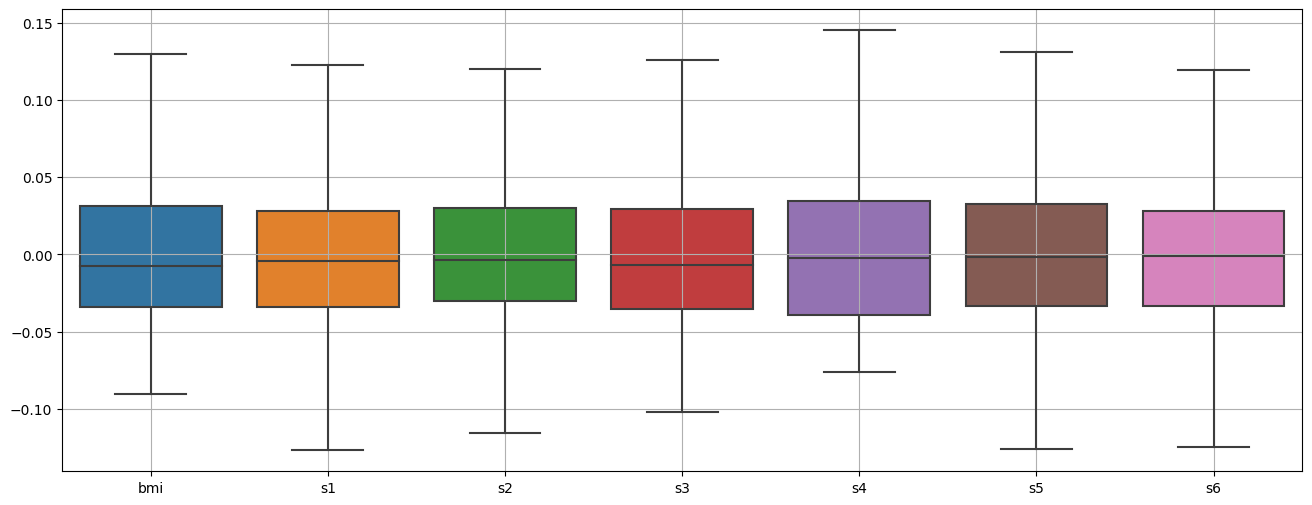

In [19]:
plt.figure(figsize = (16,6))
sns.boxplot(data = draft)
plt.grid()
plt.show()

---
- **EXTRACTION DES VALEURS ABERRANTES**

In [20]:
def extract_outliers(df, colname):
    q1 = np.percentile(df[colname], 25)
    q3 = np.percentile(df[colname], 75) 
    
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    
    return df[(df[colname] < lower_bound) | (df[colname] > upper_bound)]

In [21]:
for col in cp.columns:
    extract_outlier = extract_outliers(cp, col)

In [22]:
print(extract_outlier.shape)
extract_outlier

(9, 7)


,bmi,s1,s2,s3,s4,s5,s6
23,0.060618,0.028702,-0.047347,-0.054446,0.071210,0.133597,0.135612
84,-0.039618,-0.029088,-0.030124,0.044958,-0.050195,-0.068332,-0.129483
117,-0.021295,0.045213,0.031567,-0.047082,0.071210,0.079122,0.135612
141,0.047685,0.034206,0.057245,-0.080217,0.130252,0.045067,0.131470
168,0.059541,0.061725,0.063195,-0.058127,0.108111,0.068986,0.127328
245,-0.035307,-0.056607,-0.058620,0.030232,-0.039493,-0.049872,-0.129483
350,0.060618,0.012191,-0.017598,-0.002903,-0.002592,0.070207,0.135612
406,-0.080575,-0.037344,-0.037013,0.033914,-0.039493,-0.056153,-0.137767
428,0.088642,0.035582,0.021546,-0.024993,0.034309,0.066051,0.131470
